In [23]:
import os
import sys
import h5py
import pandas as pd
import cv2
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from nufebtools import area2d

In [35]:
# This cell is tagged `parameters` for use with papermill
# controlling variables, should eventually be arguments

# flag to keep us from doing stuff we only want done when manually running the notebook
# implication is that papermill should definitely pass this parameter as False
interactive = False

# We may want to ocassionally generate figures non-interactively
# setting these to True will override interactive for the associated figure
save_plot_colony_growth = False
save_plot_facet = True
save_plot_colonies = True

# In a dry run, don't actually write output
dry_run = False

# Absolute path to directory containing the run information
#rundir = ''
rundir = '/home/joe/professional/research/NUFEB-cyanobacteria/data/exploratory/fourth_test_with_dist/distributions/Run_16_1'

# directories in which to find run results and write output
resultsdir = 'Results'
outdir = 'shape_metrics'

# Name of the hdf5 encoded file with all dumped NUFEB output
h5file = 'trajectory.h5'

# specifying pixels per meter instead of specifying image width and height
# this allows us to analyze virtual images at the same resolution as the real
# lab images
px_pm = 3e6

# x and y dimensions in meters of simulation
# TODO all current runs use this span, but it there should be a supplemental script which understands the input
# files and is used to populate these
sim_xspan = 1e-4
sim_yspan = 1e-4

## print diagnostic output
area2d.DEBUG_PRINT=False


In [36]:
infile = os.path.join(rundir, h5file)
os.makedirs(os.path.join(rundir, resultsdir, outdir), exist_ok=True)

if(interactive):
    %matplotlib inline
    # make inline images look a bit bigger
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.rcParams['figure.dpi'] = 96

In [37]:
# %%
# Why we are working with images generated from simulation data and not using
# externally generated images from lammps dumps
# 1) to easily associate logical values (such as seed id) with image locations
# 2) create images that are easy to mask, threshold, etc without dealing with
#    dump format
# 3) avoid having to redo run to generate necessary images
# 4) Consistent images to compare
# 5) Images are a 2D projection of the 3D biomass, which corresponds to what
#    happens when imaging real colonies
# 6) Remove the need to generate image dumps at all during simulation time

# height and width of simulation area in terms of image pixels
im_height = int(sim_yspan*px_pm)
im_width = int(sim_xspan*px_pm)

In [38]:
# read the hdf5 file storing simulation results
traj = h5py.File(infile, 'r')

In [39]:
ancestry = area2d.assign_ancestry(traj)

In [40]:
colony_morphologies = area2d.get_colony_morphologies_at_times(area2d.get_timesteps(traj)[0], ancestry, traj, px_pm, im_height, im_width)
if(interactive):
    display(colony_morphologies)

In [41]:
if(interactive | save_plot_colony_growth):
    p = area2d.plot_colony_growth(colony_morphologies)
    if(save_plot_colony_growth):
        outfile = os.path.join(rundir, resultsdir, outdir, 'colony_growth.png')
        p.get_figure().savefig(outfile)

In [42]:
facet_morphologies = area2d.get_facet_morphologies(traj,px_pm,im_height,im_width)
if(interactive):
    display(facet_morphologies)


In [43]:
vizscale = 5

if(interactive | save_plot_facet):
    facet_image = area2d.graph_facets(traj,px_pm,im_height,im_width,vizscale)
    if(save_plot_facet):
        outfile = os.path.join(rundir, resultsdir, outdir, 'facets.png')
        cv2.imwrite(outfile,facet_image)

In [44]:
combined_morphologies = area2d.combine_morphologies(colonies=colony_morphologies,facets=facet_morphologies)
if(interactive):
    display(combined_morphologies)

In [45]:
outfile = os.path.join(rundir, resultsdir, outdir, 'run_areas_2d.csv')
if(dry_run):
    print(f'Writing combined_morphologies to {outfile}')
else:
    combined_morphologies.to_csv(outfile)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


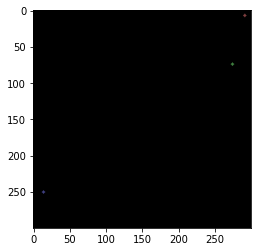

In [46]:


if(interactive | save_plot_colonies):
    timesteps,start_time, end_time = area2d.get_timesteps(traj)
    raw_img = area2d.plot_colonies_at_time(end_time, traj, px_pm, ancestry, im_height, im_width, vizscale)
    if(save_plot_colonies):
        outfile = os.path.join(rundir, resultsdir, outdir, f'colonies_{end_time}.png')
        #cv2.imwrite(outfile, cv2.flip(raw_img, 1))
        plt.imshow(cv2.flip(raw_img, 1))
        plt.savefig(outfile)
    raw_img = area2d.plot_colonies_at_time(start_time, traj, px_pm, ancestry, im_height, im_width, vizscale)
    if(save_plot_colonies):
        outfile = os.path.join(rundir, resultsdir, outdir, f'colonies_{start_time}.png')
        #cv2.imwrite(outfile, cv2.flip(raw_img, 1))
        plt.imshow(cv2.flip(raw_img, 1))
        plt.savefig(outfile)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

KeyError: 0

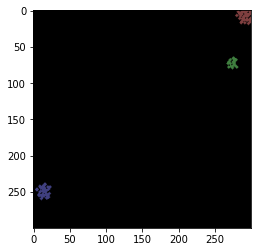

In [51]:
#timesteps,start_time, end_time = area2d.get_timesteps(traj)
#for t in timesteps:
#    raw_img = area2d.plot_colonies_at_time(t, traj, px_pm, ancestry, im_height, im_width, vizscale)
#    if(save_plot_colonies):
#        outfile = os.path.join(rundir, resultsdir, outdir, f'colonies_{t}.png')
#        #cv2.imwrite(outfile, cv2.flip(raw_img, 1))
#        plt.imshow(cv2.flip(raw_img, 1))
#        plt.savefig(outfile)